In [40]:
import pandas as pd
import pymatgen
import pickle as pk
from matplotlib import pyplot as plt

eform_initial = pd.read_csv("TSNE_Initial_eform.csv")
egap_initial = pd.read_csv("TSNE_Initial_egap.csv")
eform_DIM = pd.read_csv("TSNE_nocomp_klnorm_moremultiloss_eform.csv")
egap_DIM = pd.read_csv("TSNE_nocomp_klnorm_moremultiloss_egap.csv")

datasets = [eform_initial,egap_initial,eform_DIM,egap_DIM]


In [41]:
datasets_live = [i.copy(deep=True) for i in datasets]
for index in range(len(datasets_live)):
    datasets_live[index]["primitive"] = datasets_live[index]["structure"].apply(lambda x: pk.loads(eval(x)).get_primitive_structure())

pk.dump(datasets_live,open("TSNE_cache.pk","wb"))

In [42]:
datasets_live = pk.load(open("TSNE_cache.pk","rb"))
print(datasets_live[0].columns)

Index(['Unnamed: 0', '0', '1', 'structure', 'target', 'primitive'], dtype='object')


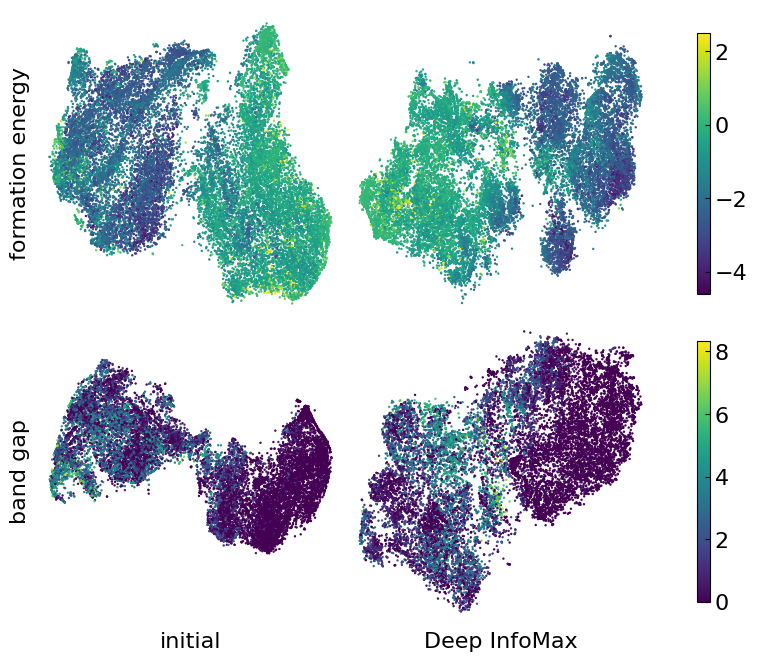

In [45]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

fig,ax = plt.subplots(2, 3, sharex=False, sharey="row",gridspec_kw={'wspace':0, 'hspace':0.0},figsize=(8.7,8),width_ratios=[4,4,0.7],height_ratios=[1,1])
eform_initial_TSNE = datasets_live[0]
egap_initial_TSNE = datasets_live[1] 

ax[0][0].set_ylabel("formation energy")
ax[1][0].set_ylabel("band gap")
ax[1][0].set_xlabel("initial")
ax[1][1].set_xlabel("Deep InfoMax")

# make spines (the box) invisible
plt.setp(ax[0,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,0].patch.set_visible(False)
plot = ax[0][0].scatter(datasets_live[0]["0"],datasets_live[0]["1"],s=0.5,c=datasets_live[0]["target"])
#fig.colorbar(plot,ax=ax[0][0])

# make spines (the box) invisible
plt.setp(ax[1,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,0].patch.set_visible(False)
plot = ax[1][0].scatter(datasets_live[1]["0"],datasets_live[1]["1"],s=0.5,c=datasets_live[1]["target"])
#fig.colorbar(plot,ax=ax[1][0])

# make spines (the box) invisible
plt.setp(ax[0,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,1].patch.set_visible(False)
plot = ax[0][1].scatter(datasets_live[2]["0"],datasets_live[2]["1"],s=0.5,c=datasets_live[2]["target"])
fig.colorbar(plot,ax=ax[0][2],fraction=0.24)

# make spines (the box) invisible
plt.setp(ax[1,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,1].patch.set_visible(False)
plot = ax[1][1].scatter(datasets_live[3]["0"],datasets_live[3]["1"],s=0.5,c=datasets_live[3]["target"])
fig.colorbar(plot,ax=ax[1][2],fraction=0.24)

ax[0,2].axis("off")
ax[1,2].axis("off")
fig.savefig("TSNE_Property.png")
fig.show()

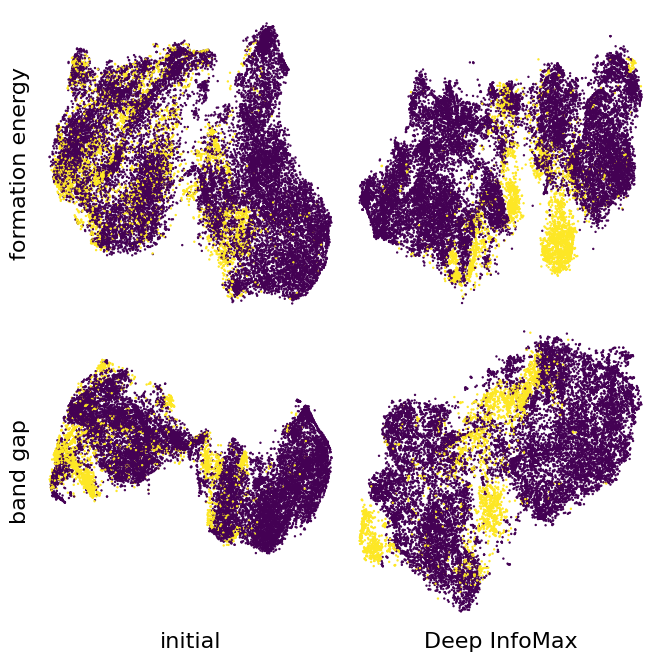

In [46]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

def get_property(df):
    values = [i.composition.contains_element_type("halogen") for i in df["primitive"]]
    return values

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

fig,ax = plt.subplots(2, 2, sharex=False, sharey="row",gridspec_kw={'wspace':0, 'hspace':0.0},figsize=(8,8),width_ratios=[4,4],height_ratios=[1,1])
eform_initial_TSNE = datasets_live[0]
egap_initial_TSNE = datasets_live[1] 

ax[0][0].set_ylabel("formation energy")
ax[1][0].set_ylabel("band gap")
ax[1][0].set_xlabel("initial")
ax[1][1].set_xlabel("Deep InfoMax")

# make spines (the box) invisible
plt.setp(ax[0,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,0].patch.set_visible(False)
plot = ax[0][0].scatter(datasets_live[0]["0"],datasets_live[0]["1"],s=0.5,c=get_property(datasets_live[0]))
#fig.colorbar(plot,ax=ax[0][0])

# make spines (the box) invisible
plt.setp(ax[1,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,0].patch.set_visible(False)
plot = ax[1][0].scatter(datasets_live[1]["0"],datasets_live[1]["1"],s=0.5,c=get_property(datasets_live[1]))
#fig.colorbar(plot,ax=ax[1][0])

# make spines (the box) invisible
plt.setp(ax[0,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,1].patch.set_visible(False)
plot = ax[0][1].scatter(datasets_live[2]["0"],datasets_live[2]["1"],s=0.5,c=get_property(datasets_live[2]))
#fig.colorbar(plot,ax=ax[0][2],fraction=0.24)

# make spines (the box) invisible
plt.setp(ax[1,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,1].patch.set_visible(False)
plot = ax[1][1].scatter(datasets_live[3]["0"],datasets_live[3]["1"],s=0.5,c=get_property(datasets_live[3]))
#fig.colorbar(plot,ax=ax[1][2],fraction=0.24)

#ax[0,2].axis("off")
#ax[1,2].axis("off")
fig.savefig("TSNE_Halogen.png")
fig.show()

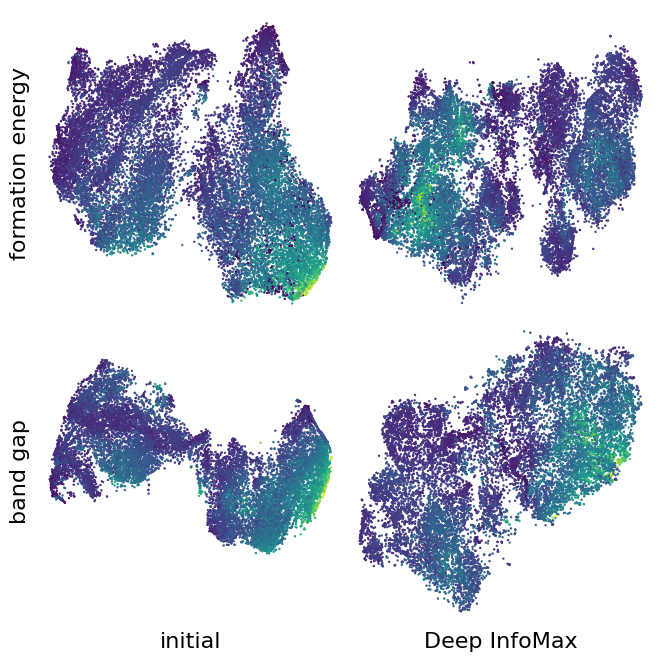

In [48]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

def get_property(df):
    values = [i.density for i in df["primitive"]]
    return values

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

fig,ax = plt.subplots(2, 2, sharex=False, sharey="row",gridspec_kw={'wspace':0, 'hspace':0.0},figsize=(8,8),width_ratios=[4,4],height_ratios=[1,1])
eform_initial_TSNE = datasets_live[0]
egap_initial_TSNE = datasets_live[1] 

ax[0][0].set_ylabel("formation energy")
ax[1][0].set_ylabel("band gap")
ax[1][0].set_xlabel("initial")
ax[1][1].set_xlabel("Deep InfoMax")

# make spines (the box) invisible
plt.setp(ax[0,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,0].patch.set_visible(False)
plot = ax[0][0].scatter(datasets_live[0]["0"],datasets_live[0]["1"],s=0.5,c=get_property(datasets_live[0]))
#fig.colorbar(plot,ax=ax[0][0])

# make spines (the box) invisible
plt.setp(ax[1,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,0].patch.set_visible(False)
plot = ax[1][0].scatter(datasets_live[1]["0"],datasets_live[1]["1"],s=0.5,c=get_property(datasets_live[1]))
#fig.colorbar(plot,ax=ax[1][0])

# make spines (the box) invisible
plt.setp(ax[0,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,1].patch.set_visible(False)
plot = ax[0][1].scatter(datasets_live[2]["0"],datasets_live[2]["1"],s=0.5,c=get_property(datasets_live[2]))
#fig.colorbar(plot,ax=ax[0][2],fraction=0.24)

# make spines (the box) invisible
plt.setp(ax[1,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,1].patch.set_visible(False)
plot = ax[1][1].scatter(datasets_live[3]["0"],datasets_live[3]["1"],s=0.5,c=get_property(datasets_live[3]))
#fig.colorbar(plot,ax=ax[1][2],fraction=0.24)

#ax[0,2].axis("off")
#ax[1,2].axis("off")
fig.savefig("TSNE_Density.png")
fig.show()

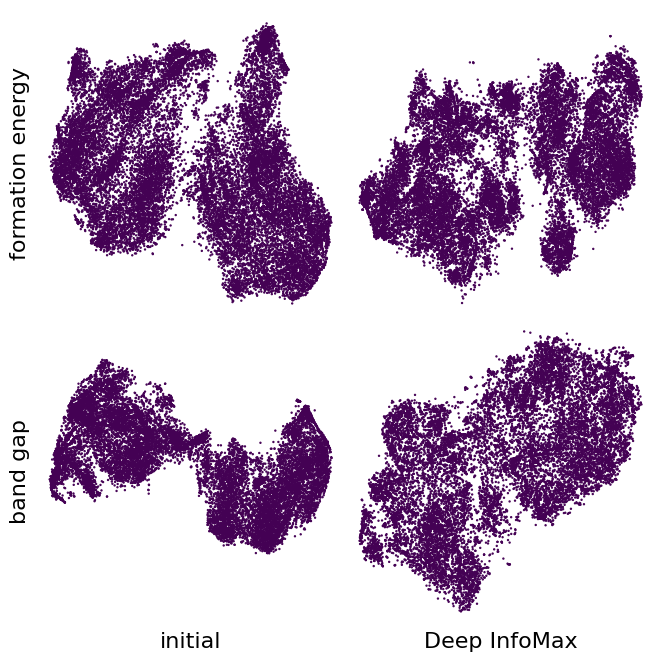

In [49]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

def get_property(df):
    values = [i.charge for i in df["primitive"]]
    return values

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

fig,ax = plt.subplots(2, 2, sharex=False, sharey="row",gridspec_kw={'wspace':0, 'hspace':0.0},figsize=(8,8),width_ratios=[4,4],height_ratios=[1,1])
eform_initial_TSNE = datasets_live[0]
egap_initial_TSNE = datasets_live[1] 

ax[0][0].set_ylabel("formation energy")
ax[1][0].set_ylabel("band gap")
ax[1][0].set_xlabel("initial")
ax[1][1].set_xlabel("Deep InfoMax")

# make spines (the box) invisible
plt.setp(ax[0,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,0].patch.set_visible(False)
plot = ax[0][0].scatter(datasets_live[0]["0"],datasets_live[0]["1"],s=0.5,c=get_property(datasets_live[0]))
#fig.colorbar(plot,ax=ax[0][0])

# make spines (the box) invisible
plt.setp(ax[1,0].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,0].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,0].patch.set_visible(False)
plot = ax[1][0].scatter(datasets_live[1]["0"],datasets_live[1]["1"],s=0.5,c=get_property(datasets_live[1]))
#fig.colorbar(plot,ax=ax[1][0])

# make spines (the box) invisible
plt.setp(ax[0,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[0,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[0,1].patch.set_visible(False)
plot = ax[0][1].scatter(datasets_live[2]["0"],datasets_live[2]["1"],s=0.5,c=get_property(datasets_live[2]))
#fig.colorbar(plot,ax=ax[0][2],fraction=0.24)

# make spines (the box) invisible
plt.setp(ax[1,1].spines.values(), visible=False)
# remove ticks and labels for the left axis
ax[1,1].tick_params(left=False, labelleft=False,bottom=False,labelbottom=False)
#remove background patch (only needed for non-white background)
ax[1,1].patch.set_visible(False)
plot = ax[1][1].scatter(datasets_live[3]["0"],datasets_live[3]["1"],s=0.5,c=get_property(datasets_live[3]))
#fig.colorbar(plot,ax=ax[1][2],fraction=0.24)

#ax[0,2].axis("off")
#ax[1,2].axis("off")
fig.savefig("TSNE_Density.png")
fig.show()

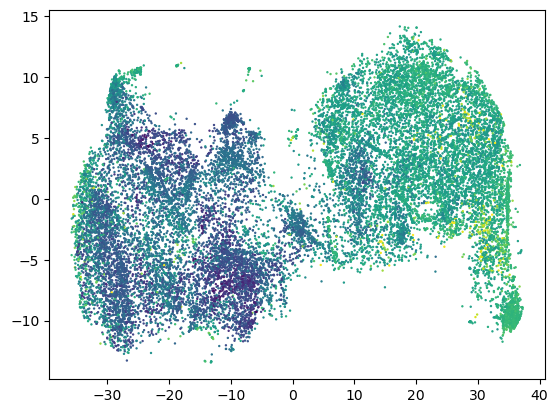

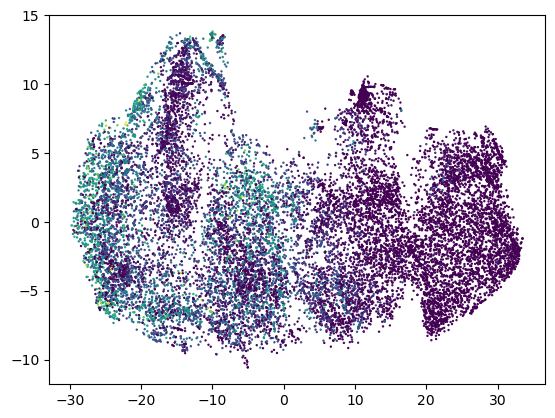

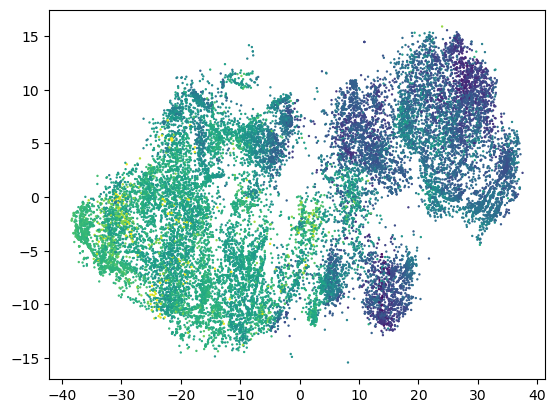

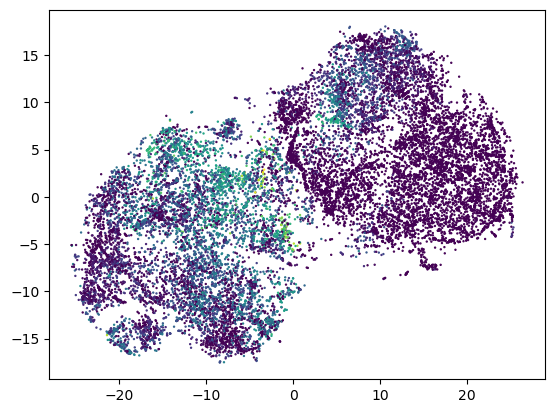

In [5]:
for dataset in datasets_live:
    plt.figure()
    #dataset["property"] = [i.get_space_group_info()[1]==221 for i in dataset["primitive"]]
    plt.scatter(dataset["0"],dataset["1"],s=0.5,c=dataset["target"])

In [32]:
from pymatgen.symmetry.groups import SpaceGroup

SpaceGroup.get_settings()

TypeError: get_settings() missing 1 required positional argument: 'int_symbol'